<a href="https://colab.research.google.com/github/GentleWine/ML-project/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

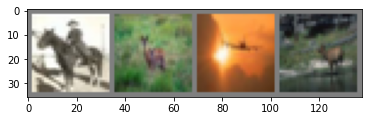

horse  deer plane  deer


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
    )
# 训练集
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=False,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
# 测试集
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=False,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)
classes=("plane","car","bird","cat","deer","dog","frog","horse","ship","truck")

import matplotlib.pyplot as plt
import numpy as np
# 定义图片显示的function
def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
# 得到随机训练图像
dataiter=iter(trainloader)
images,labels=next(dataiter)
# 展示图片
imshow(torchvision.utils.make_grid(images))
#打印标签labels
print(' '.join("%5s"%classes[labels[j]] for j in range(4)))


In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # 1个输入，6个输出，5*5的卷积
        # 内核
        self.conv1=nn.Conv2d(3,6,5)#定义三个通道
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        # 映射函数：线性——y=Wx+b
        self.fc1=nn.Linear(16*5*5,120)#输入特征值：16*5*5，输出特征值：120
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net=Net()

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=0.001,momentum=0.9)

for epoch in range(2):
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        #得到输入
        inputs,labels=data
        # 将参数的梯度值置零
        optimizer.zero_grad()
        #反向传播+优化
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        #打印数据
        running_loss+=loss.item()
        if i% 2000==1999:
            print('[%d,%5d] loss: %.3f'%(epoch+1,i+1,running_loss/2000))#每2000个输出一次
print('Finished Training')


[1, 2000] loss: 2.174
[1, 4000] loss: 4.034
[1, 6000] loss: 5.741
[1, 8000] loss: 7.342
[1,10000] loss: 8.896
[1,12000] loss: 10.391
[2, 2000] loss: 1.421
[2, 4000] loss: 2.799
[2, 6000] loss: 4.153
[2, 8000] loss: 5.505
[2,10000] loss: 6.823
[2,12000] loss: 8.102
Finished Training


In [ ]:
outputs=net(images)
_, predictd=torch.max(outputs,1)
print('Predicted:',' '.join('%5s'% classes[predictd[j]] for j in range(4)))

Predicted: horse  deer  bird   cat
